<a href="https://colab.research.google.com/github/yusik2006/CNN/blob/main/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##텐서플로 임포트하기


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD


## CIFAR-100 데이터셋 로드 및 준비하기

In [10]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

데이터 확인하기

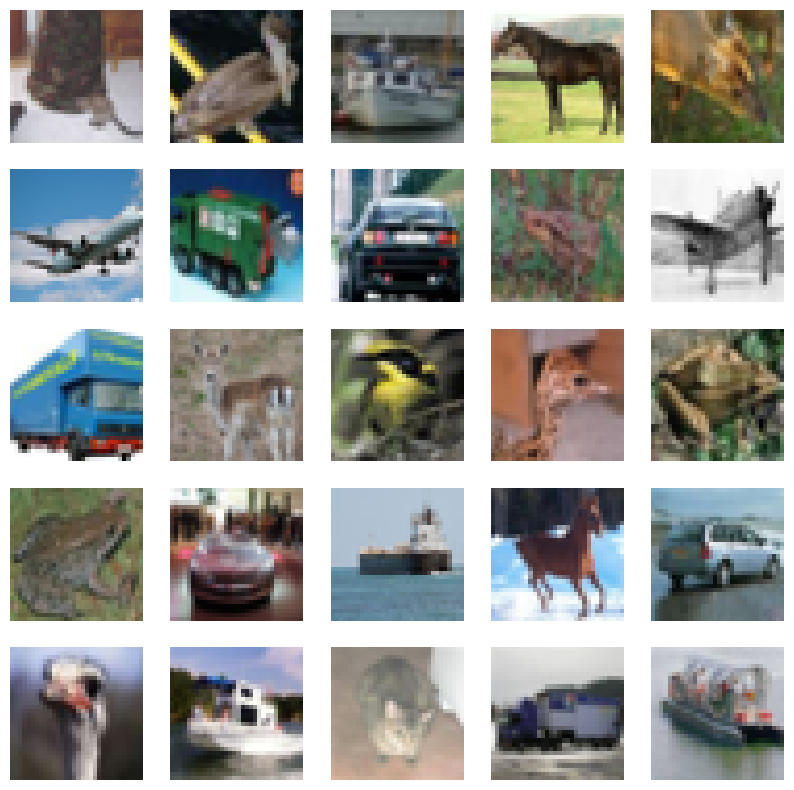

In [11]:
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 10))
for i in range(25):
    index = np.random.randint(0, len(train_images))
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[index])
    plt.axis('off')

plt.show()


##CNN모델구축

##합성곱층만들기

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

##Dense 층 추가하기

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

##모델 컴파일, 평가방법 정확도

In [14]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


##모델훈련

In [18]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 62s 98ms/step - loss: 2.2066 - accuracy: 0.1734 - val_loss: 2.1083 - val_accuracy: 0.2193
Epoch 2/10
625/625 [==============================] - 60s 95ms/step - loss: 1.9869 - accuracy: 0.2745 - val_loss: 1.9265 - val_accuracy: 0.3004
Epoch 3/10
625/625 [==============================] - 59s 95ms/step - loss: 1.8662 - accuracy: 0.3307 - val_loss: 1.7961 - val_accuracy: 0.3612
Epoch 4/10
625/625 [==============================] - 59s 95ms/step - loss: 1.7379 - accuracy: 0.3799 - val_loss: 1.6676 - val_accuracy: 0.4066
Epoch 5/10
625/625 [==============================] - 59s 95ms/step - loss: 1.6186 - accuracy: 0.4205 - val_loss: 1.5714 - val_accuracy: 0.4359
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 1.5256 - accuracy: 0.4516 - val_loss: 1.4810 - val_accuracy: 0.4683
Epoch 7/10
625/625 [==============================] - 62s 98ms/step - loss: 1.4642 - accuracy: 0.4738 - val_loss: 1.4420 - val_accuracy

##개선방안
##learning_rate를 조절해 본다.

##모델 저장

In [19]:
model.save("C:\model/c1.h5")


##저장된 모델 로드

In [20]:
loaded_model = load_model("C:\model/c1.h5")

## 테스트 세트에서 모델 평가

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도: {test_acc}')

313/313 [==============================] - 4s 14ms/step - loss: 1.3068 - accuracy: 0.5342
테스트 정확도: 0.5342000126838684
